In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
data = pd.read_csv("mnist_train.csv")


In [5]:
rownum1 = 10
if -1 < rownum1 <= len(data):
    pixels1 = data.iloc[rownum1,1:].values.reshape(28,28)
    array1 = np.array(pixels1)

Text(0.5, 1.0, 'original image')

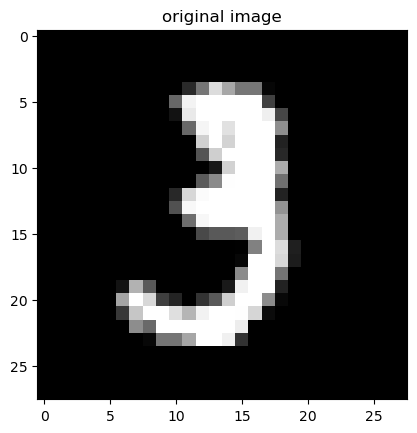

In [7]:
plt.imshow(array1,cmap='gray')
plt.title("original image")

In [10]:
def contrast_stretching(image,r1,r2,s1,s2):
    stretched = np.zeros_like(image,dtype=np.uint8)
    mask1 = image <=r1
    mask2 = (image > r1) & (image <=r2)
    mask3 = (image > r2)
    stretched[mask1] = (s1/r1) * image[mask1]
    stretched[mask2] = s1 + ((image[mask2] - r1)*((s2-s1)/(r2-r1)))
    stretched[mask3] = s2 + ((image[mask3] - r2)*((255-s2)/(255-r2)))
    
    return stretched

Text(0.5, 1.0, 'Stretched Image')

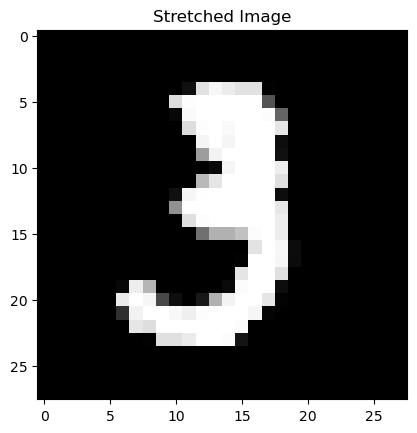

In [15]:
r1, r2, s1, s2 = 50, 100, 20, 220
stretched_array = contrast_stretching(array1,r1,r2,s1,s2)
plt.imshow(stretched_array,cmap='gray')
plt.title('Stretched Image')

In [26]:
def log_transformation(image_array,c=255/np.log(256)):
    log_transformed = c * np.log(1+image_array)
    return np.clip(log_transformed,0,255).astype(np.uint8)

Text(0.5, 1.0, 'Log Transformed')

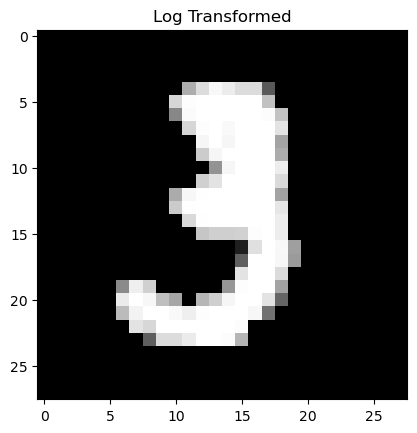

In [31]:
L = 256
c = L/np.log(1+L)
log_array = log_transformation(array1,c)
plt.imshow(log_array,cmap='gray')
plt.title("Log Transformed")


In [33]:
def power_law_transformation(image_array,c=1,r=0.5):
    power_image = c * (image_array/255.0)**r
    power_image *= 255
    return np.clip(power_image,0,255).astype(np.uint8)

Text(0.5, 1.0, 'Power Law Transformed Image')

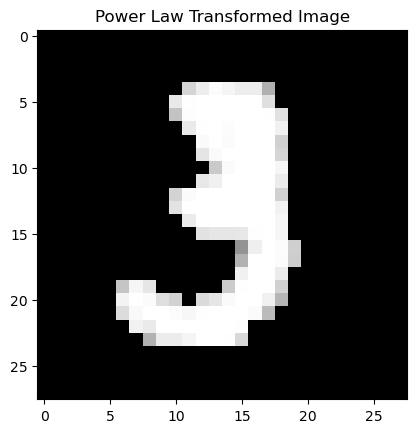

In [37]:
c = 1
r = 0.1
power_image = power_law_transformation(array1,c,r)
plt.imshow(power_image,cmap='gray')
plt.title("Power Law Transformed Image")